# SARS-CoV-2

In the year 2020, severe acute respiratory syndrome coronavirus 2, also known as SARS-CoV-2 has risen in prominence and created a global pandemic. The novel coronavirus is a single stranded RNA virus and like other viruses, is capable of rapid mutations as it infects and travels through populaces. Some preliminary researched conducted at the University of Bologna analyzed approximately 48,000 coronavirus genomes and was published in the journal "Frontiers in Microbiology." The first round of results from early August suggests that at present, there were at least six strains detected with low variability amongst them all which bodes well for vaccine development prospects.

One of the most alarming features of the novel coronavirus was its efficacy in spreading from one host to another and the speed at which it was able to propagate itself throughout the global populace. As experts studied the virus, it was discovered that in many of the locales where the coronavirus genomic sequence was sampled, there existed an overwhelming presence of a certain mutation, called the D614G mutation, in the virus’ spike protein. The spike protein is responsible for the coding of the crown shape that has come to popularly identify the coronavirus and its unique appearance. The spike proteins are what bind to host cell receptors, allowing the virus to enter host cells and begin the replication process. The D614G mutation occurs at the 614th amino acid of the spike protein. The amino acid aspartate (which is biochemically represented by the letter $D$) was being replaced by glycine (represented by the letter $G$) which led to the mutation being named the D614G mutation. This raises the question as to what makes the D614G mutation so much more infectious and the possible genomic differences that lead to it becoming the dominant strain.

# Spike Protein Gene

The spike protein is composed of two parts, $S1$ and $S2$. The $S1$ component is responsible for receptor recognition and binding to the host’s receptors while the $S2$ component dictates the cell membrane fusion process. Due to its active involvement in the process of infecting host cells, the spike protein represents a key point of research and analysis. For the purposes of this particular analysis of the coronavirus, we will be focusing solely on the spike protein and its nucleotide sequence information. The gene encoding for the coronavirus spike protein is a 1273 amino acid length sequence. 

In [1]:
from Bio import SeqIO
import editdistance
from collections import Counter
import numpy as np
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Each sample of the spike protein in the data set follows this template. From this, we can see that each individual sample contains the genomic sequence, an ID tag, description, and more information. Out of all these descriptors, we will only concern ourselves with the  RNA sequence information.

In [2]:
records = list(SeqIO.parse("sequences.fasta", "fasta"))
records[:1]

[SeqRecord(seq=Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT'), id='YP_009724390.1', name='YP_009724390.1', description='YP_009724390.1 |surface glycoprotein [Severe acute respiratory syndrome coronavirus 2]', dbxrefs=[])]

The spike protein gene of the coronavirus is known to have a length of 1273 amino acids. In cases in which the length of the sampled spike protein sequence is not 1273 aa in length, the sample will be removed for uniformity.

In [3]:
s_protein_list = []
for i in range(len(records)):
    if len(records[i].seq) == 1273:
        s_protein_list.append(records[i].seq)

len(s_protein_list)

35057

# Matrix Creation Using Levenshtein Distance

In total, there were 35,000 samples of spike protein sequences that were used but we will be working with a random 3,500 sample of the total dataset. In order to quantify the differences within this smaller sample set of spike protein sequences, I created a pairwise distance matrix, comparing each individual sequence to every other sequence in the dataset. In doing this, I decided to use the Levenshtein distance which is one example of an edit distance that measures differences between two sequences. The Levenshtein distance is essentially a measure of the least number of single-character edits needed to change one string into the other. These single-character edits are comprised of any combination of insertions, deletions, and substitutions. Mathematically, the Levenshtein distance between two strings $a, b$ is given by lev$_{a,b,}(i,j)$ where:

<img src="lev_dist.jpg" width=700 height=700 />

In working with DNA sequence information and calculating edit distances between individual sequences, the Levenshtein distance is a commonly used standard measure which is why it was used in constructing the pairwise distance matrix.

In [4]:
import random

new_s_protein_list = random.sample(s_protein_list, 3500)
s_protein_list = new_s_protein_list

In [5]:
seqs=[]

for i in s_protein_list:
    entry=[]
    entry.append(str(i))
    seqs.append(entry)

The pairwise Levenshtein distance matrix can be saved locally. Due to the computation time needed to construct these kinds of matrices, I saved the matrix locally for quick reference later on.

In [6]:
#condensed_matrix = pdist(seqs, metric = lambda a,b: editdistance.eval(a[0],b[0]))
#np.savetxt('pdist_spike_protein_random_3500.txt', condensed_matrix)

In [7]:
b = np.loadtxt('pdist_spike_protein_random_3500.txt', dtype=int)
matrix_file_small = squareform(b)

# Persistence Diagram

Coming into this analysis of the spike protein gene with background information about
the virus and the spike protein, we can expect a strong representation of the D614G mutation
and its overwhelming dominance amongst other variants.

In [8]:
from ripser import ripser
from persim import plot_diagrams
from ripser import Rips

rips = Rips()
data = matrix_file_small
diagrams = rips.fit_transform(data, distance_matrix=True)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


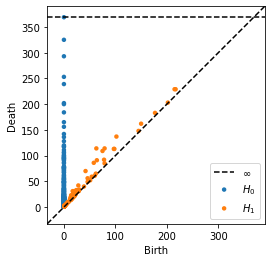

In [9]:
rips.plot(diagrams)

In looking at this persistence diagram created using Ripser package, there is some weak
evidence of a dominant singular cluster represented by the D614G mutation. We can also
seem evidence of some variant clusters but it is rather unclear. The initial findings from
the persistence diagram may also support the earlier cited claims of a six type mutation
grouping

# Visualization through T-SNE

In [10]:
from sklearn.manifold import TSNE

embedding = TSNE(n_components=2, metric='precomputed')
matrix_file_transformed = embedding.fit_transform(matrix_file_small)
X_TSNE = matrix_file_transformed

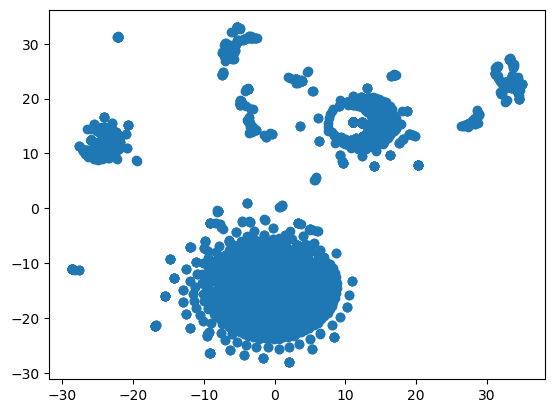

In [11]:
plt.scatter(X_TSNE[:,0], X_TSNE[:,1])

Visualizing the data through t-SNE, we can see evidence of some cluster structure. The
shape on the left may be indicative of the dominant D614G mutation and the several other
clusters and outliers may be indicative of variant strains. Again, it appears that there is
some grounds for the findings of at least six mutations of the virus.

# Visualization through Isomap

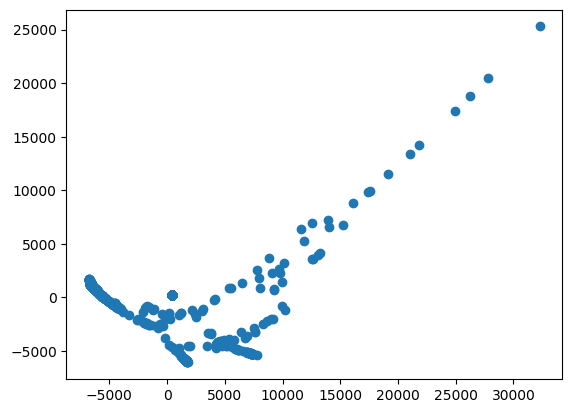

In [12]:
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)
X_Isomap = embedding.fit_transform(matrix_file_small)

plt.scatter(X_Isomap[:,0], X_Isomap[:,1])

In the ISOmap visualization, we can see a majority of the points clustered around the
bottom left. There is indication that there exists some cluster structure around this area.
As a majority of the points are focused in certain areas, this also supports the fact that the
D614G mutation is the dominant strain.

# Visualization through MDS

C:\Users\Austin\Anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


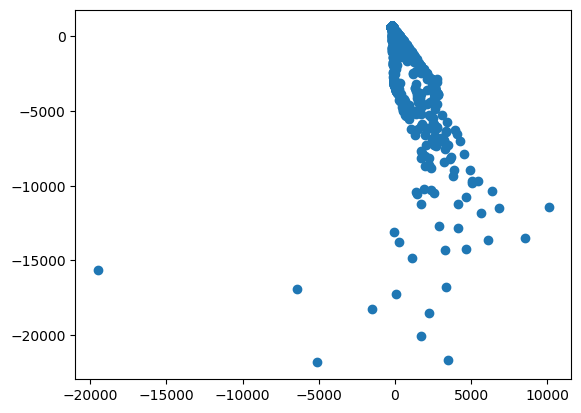

In [13]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2)
matrix_file_transformed = embedding.fit_transform(matrix_file_small)
X_MDS = matrix_file_transformed

plt.scatter(X_MDS[:,0], X_MDS[:,1])

In the MDS visualization, there is strong evidence of a major cluster concentrated in a V shape. Again, this likely points towards the dominant D614G mutation.

# K-Means

So far, an exploration of the data and visualizing through dimensionality reduction
techniques seem to suggest that a six cluster structure may exist within the subsample of
data chosen. In order to dene that further, we can try using K-Means to detect whether
six clusters do exist.
K-Means clustering is a method of searching for a pre-determined number of clusters
within a dataset. The algorithm iteratively assigns each point to one of k groups based on
features and updates each cluster's centroids accordingly. This process continues until there
are no more changes amongst clusters.

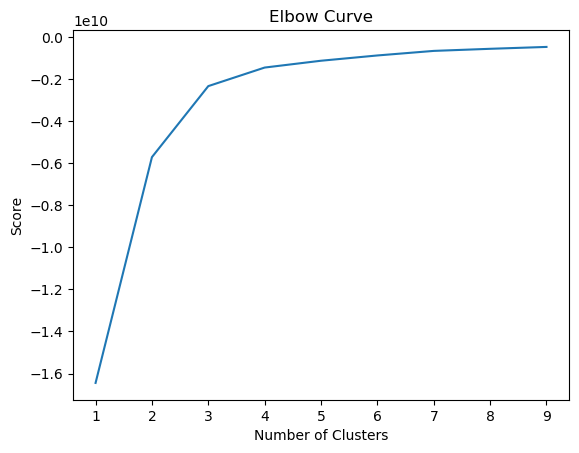

In [14]:
x = matrix_file_small

Nc = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

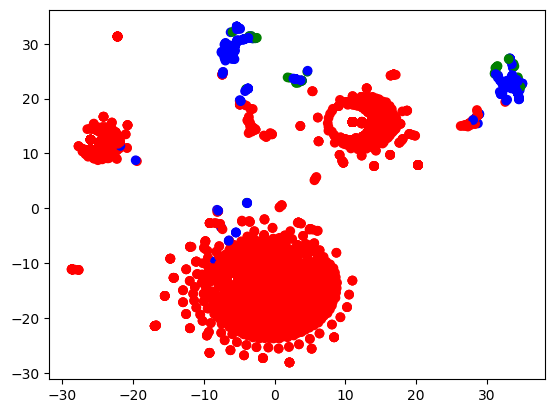

In [15]:
model = KMeans(n_clusters = 3)
model.fit(x)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Pink'])
z = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c = colormap[model.labels_])

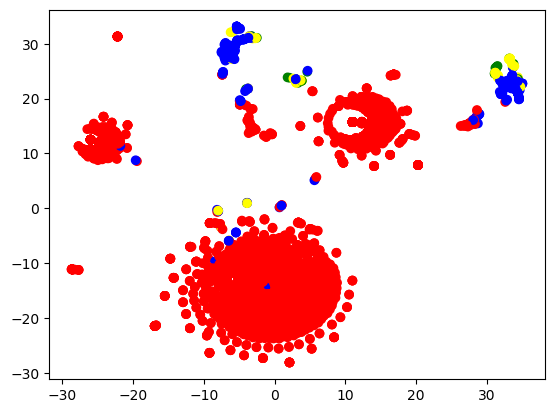

In [16]:
model = KMeans(n_clusters = 4)
model.fit(x)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Pink'])
z = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c = colormap[model.labels_])

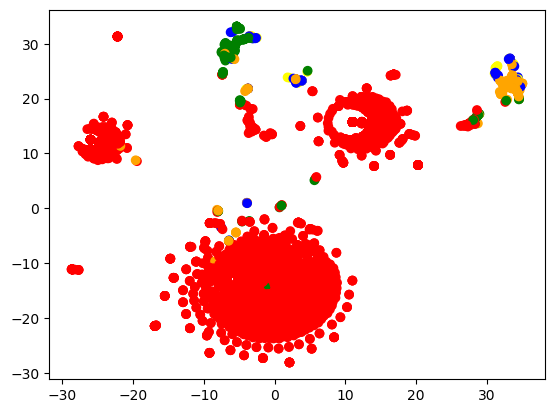

In [17]:
model = KMeans(n_clusters = 5)
model.fit(x)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Pink'])
z = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c = colormap[model.labels_])

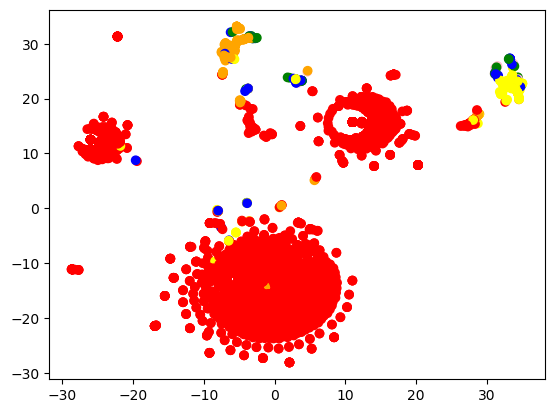

In [18]:
model = KMeans(n_clusters = 6)
model.fit(x)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Pink'])
z = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c = colormap[model.labels_])

The biggest cluster that is likely indicative of the dominant mutated strain is grouped
as expected. However, the variant strains are not as rigidly grouped into respective clusters.
Some of the variant clusters are even grouped in with the dominant mutation cluster.

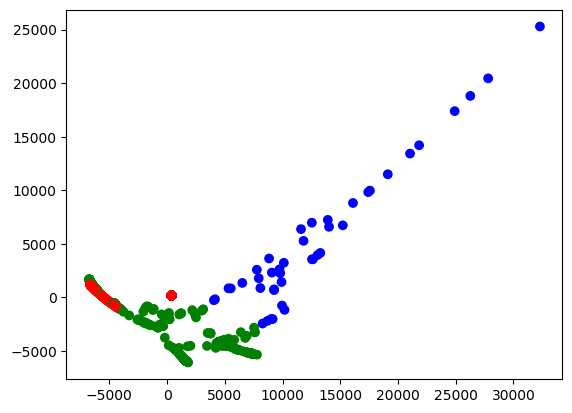

In [20]:
model = KMeans(n_clusters = 3)
model.fit(x)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Pink'])
z = plt.scatter(X_Isomap[:,0], X_Isomap[:,1], c = colormap[model.labels_])

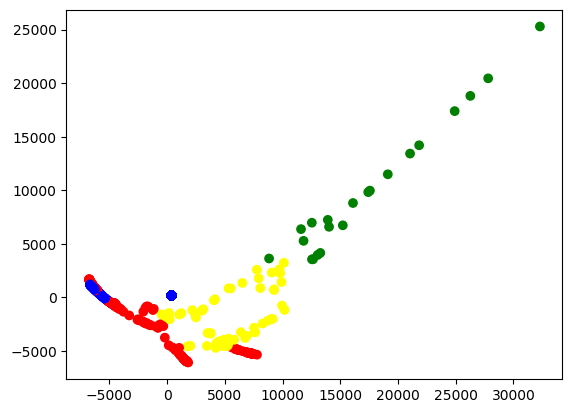

In [21]:
model = KMeans(n_clusters = 4)
model.fit(x)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Pink'])
z = plt.scatter(X_Isomap[:,0], X_Isomap[:,1], c = colormap[model.labels_])

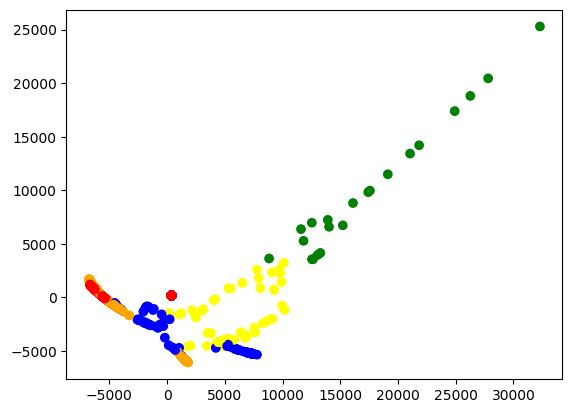

In [22]:
model = KMeans(n_clusters = 5)
model.fit(x)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Pink'])
z = plt.scatter(X_Isomap[:,0], X_Isomap[:,1], c = colormap[model.labels_])

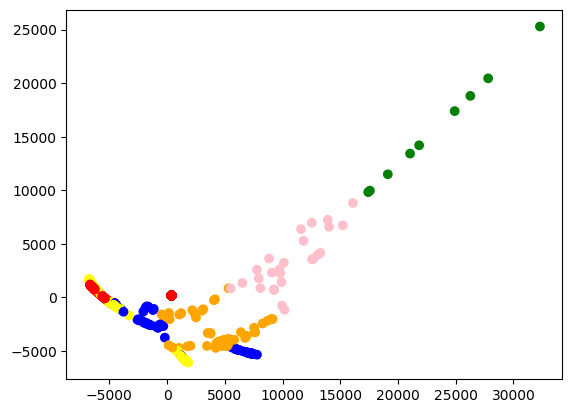

In [23]:
model = KMeans(n_clusters = 6)
model.fit(x)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Pink'])
z = plt.scatter(X_Isomap[:,0], X_Isomap[:,1], c = colormap[model.labels_])

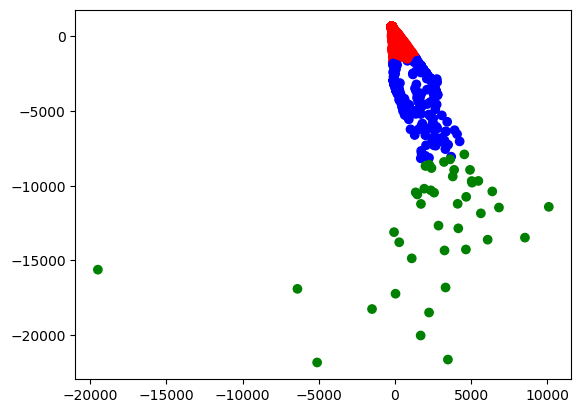

In [24]:
model = KMeans(n_clusters = 3)
model.fit(x)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Pink'])
z = plt.scatter(X_MDS[:,0], X_MDS[:,1], c = colormap[model.labels_])

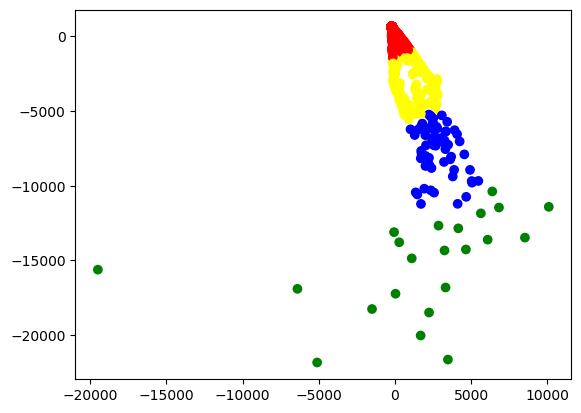

In [25]:
model = KMeans(n_clusters = 4)
model.fit(x)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Pink'])
z = plt.scatter(X_MDS[:,0], X_MDS[:,1], c = colormap[model.labels_])

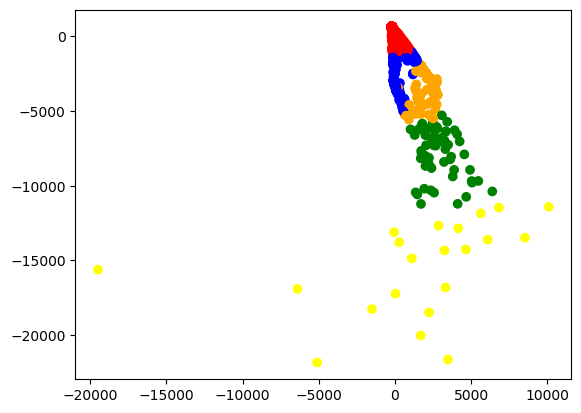

In [26]:
model = KMeans(n_clusters = 5)
model.fit(x)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Pink'])
z = plt.scatter(X_MDS[:,0], X_MDS[:,1], c = colormap[model.labels_])

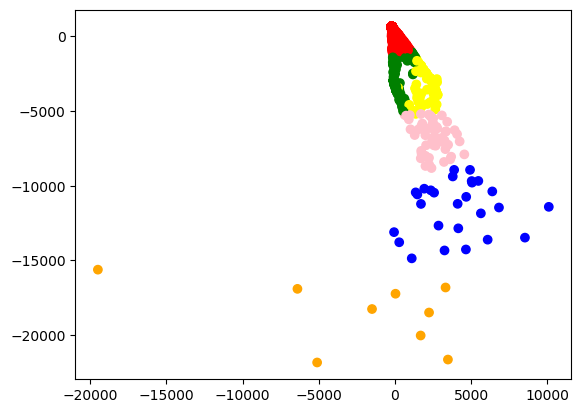

In [27]:
model = KMeans(n_clusters = 6)
model.fit(x)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Pink'])
z = plt.scatter(X_MDS[:,0], X_MDS[:,1], c = colormap[model.labels_])

In looking at the spike protein, there is still a lot of room for looking at the topological
structure of the gene and going more in-depth with clustering methods. In studying the
coronavirus, the specific D614G mutation found within the spike protein gene has been
shown by multiple studies to be instrumental in its spread and high infection rate. This
current mutation is the most prevalent in the world and it is worth looking into whether
there is any further distinctions that can be made that further subcategorizes this strain,
Whether that be through the spike protein itself where this mutation is found or other parts
of the genome that may act in conjunction with the mutated spike gene.